# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import nltk
import re
import matplotlib.pyplot as plt
# Import word_tokenize and stopwords from nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

import nltk
import nltk.corpus
import string
from gensim.models.word2vec import Word2Vec
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

In [ ]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

# Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/nela10sample.csv")
data.content=data.content.astype(str)
data.title=data.title.astype(str)

In [ ]:
data

In [ ]:
# Concetanate title and content
data["content"] = data["title"] + " " + data["content"]

#Keep only content, Reliability as columns
data = data.drop(['id','date','source','title','author','url','published','published_utc','collection_utc'],axis=1)

In [ ]:
data

In [ ]:
print (data['Reliability'].value_counts())

2    53276
0    49278
Name: Reliability, dtype: int64


In [ ]:
print (data.content[0])

In [ ]:
def rem_noise(text):
  text = text.translate(str.maketrans('','',string.punctuation))

  text =  re.sub('[0-9]+','',text)

  text = re.sub('https?:\S+','',text)

  text =  re.sub('<.*?>'," ",text)

  return text



In [ ]:
stop = set(stopwords.words('english'))

def rem_stopwords(text):
    
    words = [ch for ch in text if ch not in stop]
    words= "".join(words).split()
    words= [words.lower() for words in text.split()]
    
    return words      

In [ ]:
def tokenize_statements(text):
    
    # Tokenize the words
    tokenized = word_tokenize(text)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words, changing text to lowercase
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token.lower(), pos='a') for token in tokenized]
    
    return tokenized

In [ ]:
data.head

In [ ]:
df1 = data[:2500]
df2 = data[-2500:]
df3 = [df1,df2]
smallerdf = pd.concat(df3)

In [ ]:
smallerdf.shape

(5000, 2)

In [ ]:
smallerdf.head

In [ ]:
preprocessed['content'] = smallerdf['content'].apply(rem_noise)

In [ ]:
preprocessed['content']

In [ ]:
# split the dataset into training and testing datasets 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocessed['content'], smallerdf['Reliability'], test_size=0.20)

In [ ]:
print (X_train)

In [ ]:
# Apply text pre-processing, then vectorize the text so the models can actually interpret it
vectorizer = TfidfVectorizer(tokenize_statements)
x_train_vectorized = vectorizer.fit_transform(X_train)
x_test_vectorized = vectorizer.transform(X_test)

In [ ]:
print (x_train_vectorized.shape)
print (x_test_vectorized.shape)
print (y_train.shape)
print (y_test.shape)

In [ ]:
print(x_train_vectorized)

#Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_vectorized, y_train)
logR_predicted = log_reg.predict(x_test_vectorized)
print(f"{log_reg.__class__.__name__} accuracy: {log_reg.score(x_test_vectorized, y_test)}")

LogisticRegression accuracy: 0.881


In [ ]:
print(classification_report(y_test, logR_predicted))
print('\n')
print(confusion_matrix(y_test, logR_predicted))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       493
           2       0.92      0.82      0.87       507

    accuracy                           0.87      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.88      0.87      0.87      1000



[[458  35]
 [ 92 415]]


In [ ]:
cv_results = cross_validate(log_reg, x_train_vectorized, y_train, cv=5)
cv_results['test_score'].mean()

0.83525

#Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=100)
random_forest.fit(x_train_vectorized, y_train)

print(f"{random_forest.__class__.__name__} accuracy: {random_forest.score(x_test_vectorized, y_test)}")

RandomForestClassifier accuracy: 0.784


In [ ]:
rForest_pred = random_forest.predict(x_test_vectorized)
print(classification_report(y_test, rForest_pred))
print('\n')
print(confusion_matrix(y_test, rForest_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       504
           2       0.78      0.79      0.78       496

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



[[393 111]
 [105 391]]


In [ ]:
cv_results = cross_validate(random_forest, x_train_vectorized, y_train, cv=5)
cv_results['test_score'].mean()

0.784

# Multinomial Naive Bayes

In [ ]:
multi_nb = MultinomialNB()
multi_nb.fit(x_train_vectorized, y_train)
print(f"{multi_nb.__class__.__name__} accuracy: {multi_nb.score(x_test_vectorized, y_test)}")

MultinomialNB accuracy: 0.807


In [ ]:
NaiveB_pred = multi_nb.predict(x_test_vectorized)
print(classification_report(y_test, NaiveB_pred))
print('\n')
print(confusion_matrix(y_test, NaiveB_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       504
           2       0.80      0.82      0.81       496

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



[[402 102]
 [ 91 405]]


In [ ]:
cv_results = cross_validate(multi_nb, x_train_vectorized, y_train, cv=5)
cv_results['test_score'].mean()

0.79475

#SVM

In [ ]:
svm = svm.LinearSVC()
svm.fit(x_train_vectorized, y_train)
print(f"{svm.__class__.__name__} accuracy: {svm.score(x_test_vectorized, y_test)}")

LinearSVC accuracy: 0.891


In [ ]:
svm_pred = svm.predict(x_test_vectorized)

print(classification_report(y_test, svm_pred))
print('\n')
print(confusion_matrix(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       504
           2       0.91      0.86      0.89       496

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



[[462  42]
 [ 67 429]]


In [ ]:
cv_results = cross_validate(svm, x_train_vectorized, y_train, cv=5)
cv_results['test_score'].mean()

0.867

# LSTM with GloVe embedding

In [ ]:
smallerdf

In [ ]:
glovedf = smallerdf.reset_index(drop=True)

In [ ]:
cleantext = glovedf['content'].apply(rem_noise)
cleantext = cleantext.apply(rem_stopwords)

In [ ]:
cleantext

0       [students, could, take, sat, at, home, if, sch...
1       [detroit, facing, fresh, fiscal, woes, with, c...
2       [thousands, protest, michigan, governors, soci...
3       [baltimore, police, defends, planned, aerial, ...
4       [attorney, who, fought, for, civil, rights, in...
                              ...                        
4995    [north, korea, power, vacuum, brings, us, and,...
4996    [twitter, suspends, account, of, biotech, comp...
4997    [riots, have, started, in, venezuela, will, it...
4998    [true, coronavirus, death, toll, likely, highe...
4999    [who, mysteriously, deletes, tweet, about, rei...
Name: content, Length: 5000, dtype: object

In [ ]:
x = cleantext.values
y = smallerdf['Reliability']

In [ ]:
x

array([list(['students', 'could', 'take', 'sat', 'at', 'home', 'if', 'schools', 'remain', 'closed', 'a', 'home', 'version', 'of', 'the', 'sat', 'college', 'entrance', 'exam', 'is', 'being', 'prepared', 'in', 'case', 'schools', 'remain', 'closed', 'into', 'the', 'fall', 'college', 'board', 'officials', 'said', 'wednesday', 'as', 'they', 'announced', 'the', 'cancellation', 'of', 'june', 'testing', 'instead', 'of', 'a', 'paperandpencil', 'test', 'given', 'under', 'proctors', 'supervision', 'the', 'home', 'version', 'would', 'be', 'digital', 'and', 'rely', 'on', '“remote', 'proctoring”', 'that', 'could', 'include', 'using', 'the', 'computer’s', 'camera', 'and', 'microphone', 'to', 'monitor', 'movement', 'or', 'talking', 'college', 'board', 'president', 'jeremy', 'singer', 'said', 'on', 'a', 'conference', 'call', 'with', 'reporters', 'the', 'rival', 'act', 'also', 'will', 'launch', 'an', 'athome', 'option', 'in', 'late', 'fall', 'or', 'early', 'winter', 'the', 'exams', 'administrators', 'sa

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
102549    2
102550    2
102551    2
102552    2
102553    2
Name: Reliability, Length: 5000, dtype: int64

In [ ]:
from keras.preprocessing import text, sequence

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
word_to_index = tokenizer.word_index
contentSequence = tokenizer.texts_to_sequences(x)

In [ ]:
vocab_size =  len(word_to_index)
oov_tok = "<OOV>"
max_length = 250
embedding_dim = 100

In [ ]:
from keras.preprocessing.sequence import pad_sequences

contentSequence = pad_sequences(contentSequence, maxlen=max_length)

In [ ]:
contentSequence

array([[10313,    12,  4759, ...,   627,    60,   610],
       [    1,  1966,  2416, ...,  1222,     2, 42476],
       [14630,     2,   342, ...,     2,    26,   184],
       ...,
       [    0,     0,     0, ...,   231,    40,    10],
       [  680,   253,     8, ...,   114,     9,   498],
       [ 9023,   157,    69, ...,    43, 38542,   334]], dtype=int32)

#Glove Embedding

In [ ]:
# Pre-trained embedding

#EMBEDDING_FILE = ("/content/drive/My Drive/glove.6B.100d.txt")

In [ ]:
# load the whole embedding into memory

embeddings_index = {};
with open('/content/drive/My Drive/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

# create a weight matrix for words

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_to_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [ ]:
embeddings_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14068   ,  0.087165  ,  0.32644001, ..., -0.30822   ,
        -0.73694003,  0.27818999],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# Change labels
def change_labels(y):
    if y == 0:
        return 0
    if y == 2:
        return 1

y["Label"] = smallerdf.Reliability.apply(change_labels)

print(y["Label"])

0         0
1         0
2         0
3         0
4         0
         ..
102549    1
102550    1
102551    1
102552    1
102553    1
Name: Reliability, Length: 5000, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(contentSequence,y["Label"],test_size=0.20,random_state=1)

In [ ]:
X_train.shape

(4000, 250)

In [ ]:
y_train.shape

(4000,)

In [ ]:
y_train

# Defining Neural Network

In [ ]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size+1, output_dim=embedding_dim, weights=[embeddings_matrix], input_length=max_length, trainable=False))
#LSTM 
model.add(LSTM(units=128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#del embeddings_matrix


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 100)          7301800   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 7,419,177
Trainable params: 117,377
Non-trainable params: 7,301,800
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test) , epochs=5)

Epoch 1/5
125/125 [==============================] - 24s 193ms/step - loss: 0.4344 - accuracy: 0.7847 - val_loss: 0.5030 - val_accuracy: 0.7480
Epoch 2/5
125/125 [==============================] - 24s 191ms/step - loss: 0.4224 - accuracy: 0.7872 - val_loss: 0.4937 - val_accuracy: 0.7520
Epoch 3/5
125/125 [==============================] - 24s 194ms/step - loss: 0.3805 - accuracy: 0.8250 - val_loss: 0.4593 - val_accuracy: 0.7820
Epoch 4/5
125/125 [==============================] - 24s 192ms/step - loss: 0.3348 - accuracy: 0.8522 - val_loss: 0.4737 - val_accuracy: 0.7760
Epoch 5/5
125/125 [==============================] - 24s 195ms/step - loss: 0.3114 - accuracy: 0.8590 - val_loss: 0.5029 - val_accuracy: 0.7780


In [ ]:
y_pred_glove = (model.predict(X_test) > 0.5).astype("int")

In [ ]:
print(classification_report(y_test, y_pred_glove, zero_division = 1))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       506
           1       0.79      0.65      0.71       494

    accuracy                           0.74      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.75      0.74      0.74      1000



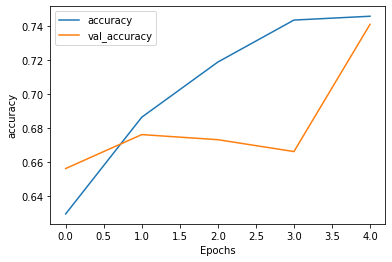

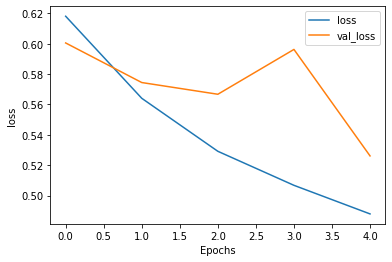

In [ ]:
#plot accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model_noGlove = Sequential()
#Non-trainable embeddidng layer
model_noGlove.add(Embedding(vocab_size+1,50,input_length=max_length))
#LSTM 
model_noGlove.add(LSTM(units=128))
model_noGlove.add(Dense(1, activation='sigmoid'))
model_noGlove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history_noGlove = model_noGlove.fit(X_train, y_train, validation_data = (X_test,y_test) , epochs=5)

125/125 [==============================] - 41s 327ms/step - loss: 0.0038 - acc: 0.9995 - val_loss: 0.8910 - val_acc: 0.8210
Epoch 4/5
125/125 [==============================] - 41s 325ms/step - loss: 0.0176 - acc: 0.9955 - val_loss: 0.8176 - val_acc: 0.7530
Epoch 5/5
125/125 [==============================] - 41s 329ms/step - loss: 0.0084 - acc: 0.9975 - val_loss: 0.8764 - val_acc: 0.8070
